We will use iris data-set which is already available

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
x = iris.data[:,[2,3]]
y=iris.target
print('Class label:' , np.unique(y))

Class label: [0 1 2]


the np.unique(y) function returned the three unique class labels stored in iris.target. 
to evaluate how will perform the model on unknown dataset by slipting the dataset

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1,stratify=y)

we are spliting data by 30 and 70 percent. train_test_split already suffles the samples. we used startify
which split and train and test sets such a way that have the same portions of class labels as the input
dataset.

In [4]:
np.bincount(y)

array([50, 50, 50], dtype=int64)

In [6]:
np.bincount(y_train)


array([35, 35, 35], dtype=int64)

In [7]:
np.bincount(y_test)

array([15, 15, 15], dtype=int64)

In [9]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(X_train)
X_train_sd = sc.transform(X_train)
X_test_std = sc.transform(X_test)

We had standardize the features using the standardScaler, using fit method the parameters sample mean and standard deviation
for each feature dimension from the training data.by calling transform we standardized the training data using those same parameters.
we used same scaling parameteres for test dataset. We can now train a perceptron model.
most the algorithms support One vs Rest multiclassification

In [20]:
from sklearn.linear_model import Perceptron
ppn= Perceptron(eta0=1, random_state=1)
ppn.fit(X_train_sd, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
y_pred = ppn.predict(X_test_std)
print((y_test != y_pred).sum())

5


In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8888888888888888


Now we will plot our data

In [32]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt



def plot_decision_regions(X, y , classifier, test_idx =None, resolution=0.02):
    
    
    # setup marker colors map
    markers = ('s','x','o','^','v')
    colors = ('red','blue', 'lightgreen',' gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    
    x1_min, x1_max = X[:,0].min()-1 , X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1 , X[:,1].max()+1
    
    xx1 , xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x= X[y==cl, 0], y=X[y==cl,1], alpha =0.8, c = colors[idx],
                   marker = markers[idx], label=cl,
                   edgecolor='black')
    
    #highlight test samples
    
    if test_idx:
        
        X_test, y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c = '',
                   marker = 'o', alpha=1 ,label='test_set',
                   edgecolor='black', linewidth=1)

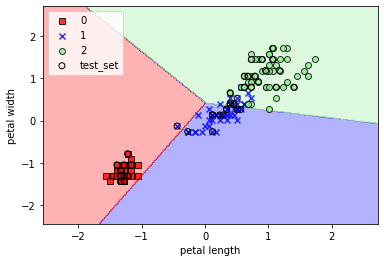

In [35]:
X_combined_std = np.vstack((X_train_sd, X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier = ppn,
                     test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()